# 📊 Machine Learning with Scikit-Learn
## ✍️ Author: Kersha Broussard  
🔗 [GitHub Repository](https://github.com/kersha0530/datafun-07-applied)


In [1]:
# 📌 Import Statements (Following Standard Conventions)

# Data Handling
import numpy as np
import pandas as pd

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure matplotlib renders inline
%matplotlib inline

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


# Machine Learning - Chart a Straight Line
## Part 1 - Chart a Straight Line
**Author:** Kersha Broussard  
**GitHub Repository:** [Repo Link Here](https://github.com/kersha0530/datafun-07-applied)


1.  ## Set Up

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2. ## Create a Celsius vs. Fahrenheit Table
Python code to create a DataFrame with Celsius values and convert them to Fahrenheit.

In [7]:
# Create a range of Celsius temperatures from -40 to 100
celsius = np.arange(-40, 101, 10)

# Convert to Fahrenheit using F = (9/5) * C + 32
fahrenheit = (9/5) * celsius + 32

# Create DataFrame
df = pd.DataFrame({'Celsius (°C)': celsius, 'Fahrenheit (°F)': fahrenheit})

# Display the first few rows
df.head()


,Celsius (°C),Fahrenheit (°F)
0,-40,-40.0
1,-30,-22.0
2,-20,-4.0
3,-10,14.0
4,0,32.0


3. ## Plot the Data as a Line Chart

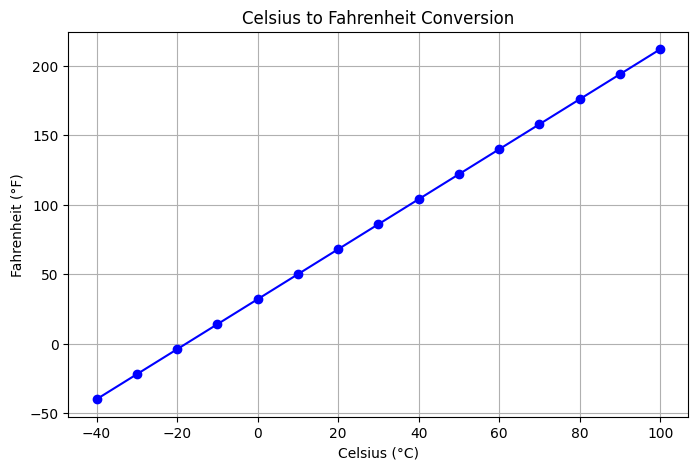

In [8]:
# Plot Celsius vs. Fahrenheit
plt.figure(figsize=(8, 5))
plt.plot(df['Celsius (°C)'], df['Fahrenheit (°F)'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title("Celsius to Fahrenheit Conversion")
plt.xlabel("Celsius (°C)")
plt.ylabel("Fahrenheit (°F)")
plt.grid(True)

# Show plot
plt.show()


4. ##  Verify Line Equation (y = mx + b)
To verify, print the slope (m) and y-intercept (b):

In [9]:
# Calculate slope and intercept
m = 9/5  # Slope (rise/run)
b = 32   # Y-intercept

print(f"Equation of the line: y = {m}x + {b}")


Equation of the line: y = 1.8x + 32


## Part 2 - Prediction  
Using Linear Regression on Average High Temperatures in NYC in January  


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


### Data Acquisition
Load the NYC temperature dataset into a DataFrame

In [13]:
# Load CSV file
file_path = "C:/44608 projects spring 2025/datafun-07-applied/chapter_10_examples/ave_hi_austin_jan_1895-2018.csv"
nyc_df = pd.read_csv(file_path)

# Display first few rows
nyc_df.head()


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [23]:
#  Print first few rows to inspect "Year" column
print("🔹 First few rows before processing:\n", nyc_df.head())

#  Print data types to check if "Year" is already numerical or string
print("🔹 Data Types Before Conversion:\n", nyc_df.dtypes)

#  Strip spaces and check unique values to diagnose issues
nyc_df["Year"] = nyc_df["Year"].astype(str).str.strip()
print("🔹 Unique Values in 'Year':\n", nyc_df["Year"].unique())

#  Keep only numeric year values (removes issues if any)
nyc_df["Year"] = nyc_df["Year"].str.extract(r"(\d{4})")  # Extracts 4-digit year
nyc_df.dropna(subset=["Year"], inplace=True)  # Remove any rows with NaN (non-matching)
nyc_df["Year"] = nyc_df["Year"].astype(int)  # Convert to integer

#  Convert "Year" to datetime format safely
nyc_df["Year"] = pd.to_datetime(nyc_df["Year"], format="%Y")

#  Set "Year" as the index
nyc_df.set_index("Year", inplace=True)

#  Print first few rows after conversion
print("🔹 Data After Cleaning:\n", nyc_df.head())

#  Display data types to verify "Year" is datetime
print("🔹 Data Types After Conversion:\n", nyc_df.dtypes)

🔹 First few rows before processing:
      Year  Avg_High_Temp  Extra_Column
0  189501           34.2          -3.2
1  189601           34.7          -2.7
2  189701           35.5          -1.9
3  189801           39.6           2.2
4  189901           36.4          -1.0
🔹 Data Types Before Conversion:
 Year               int64
Avg_High_Temp    float64
Extra_Column     float64
dtype: object
🔹 Unique Values in 'Year':
 ['189501' '189601' '189701' '189801' '189901' '190001' '190101' '190201'
 '190301' '190401' '190501' '190601' '190701' '190801' '190901' '191001'
 '191101' '191201' '191301' '191401' '191501' '191601' '191701' '191801'
 '191901' '192001' '192101' '192201' '192301' '192401' '192501' '192601'
 '192701' '192801' '192901' '193001' '193101' '193201' '193301' '193401'
 '193501' '193601' '193701' '193801' '193901' '194001' '194101' '194201'
 '194301' '194401' '194501' '194601' '194701' '194801' '194901' '195001'
 '195101' '195201' '195301' '195401' '195501' '195601' '195701' '195

* ## Plot of Time Series Data

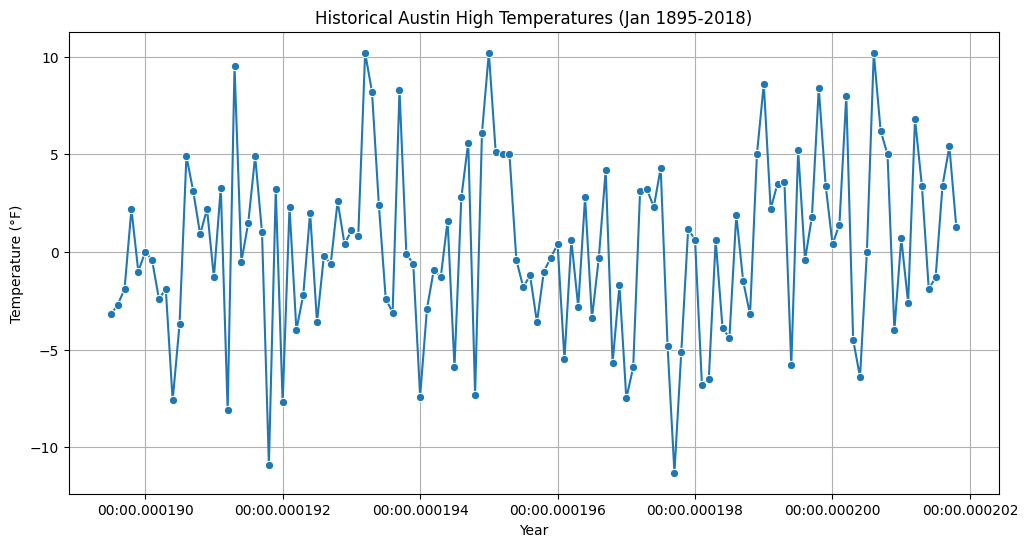

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y=df.columns[1], marker="o")  # Use second column for temperature
plt.title("Historical Austin High Temperatures (Jan 1895-2018)")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.grid(True)

# 📌 Show Plot
plt.show()

* ## Descriptive Statistics

In [25]:
# Set display precision
pd.set_option("display.precision", 2)

# Show descriptive statistics
nyc_df.describe()


,Avg_High_Temp,Extra_Column
count,124.00,124.00
mean,37.60,0.20
std,4.54,4.54
min,26.10,-11.30
25%,34.58,-2.82
50%,37.60,0.20
75%,40.60,3.20
max,47.60,10.20


* ## Section 1 - Build the Model
Using linear regression to find the best-fit line (slope & intercept):

In [29]:
import pandas as pd

#  Load CSV File (without parsing dates yet)
file_path = "C:/44608 projects spring 2025/datafun-07-applied/chapter_10_examples/ave_hi_austin_jan_1895-2018.csv"
nyc_df = pd.read_csv(file_path)

#  Display column names
print("🔹 Column Names:", nyc_df.columns)


🔹 Column Names: Index(['Date', 'Value', 'Anomaly'], dtype='object')


* ## Section 2- Test the Model

In [38]:
import pandas as pd

#  Load CSV File
file_path = "C:/44608 projects spring 2025/datafun-07-applied/chapter_10_examples/ave_hi_austin_jan_1895-2018.csv"
nyc_df = pd.read_csv(file_path)

#  Display column names to verify structure
print("🔹 Column Names:", nyc_df.columns)

#  Rename columns for clarity
nyc_df.rename(columns={"Date": "Year", "Value": "Avg_High_Temp"}, inplace=True)  

#  Extract only the **four-digit** year from the "Year" column
nyc_df["Year"] = nyc_df["Year"].astype(str).str.extract(r"(\d{4})")  

#  Convert "Year" to numeric
nyc_df["Year"] = pd.to_numeric(nyc_df["Year"], errors="coerce")

#  Drop any NaN values (if extraction failed for some rows)
nyc_df.dropna(subset=["Year"], inplace=True)

#  Convert "Year" to integer
nyc_df["Year"] = nyc_df["Year"].astype(int)

#  Set "Year" as Index
nyc_df.set_index("Year", inplace=True)

#  Print first few rows after conversion
print("🔹 Data After Fixing:\n", nyc_df.head())

#  Display data types to verify "Year" is correct
print("🔹 Data Types After Fixing:\n", nyc_df.dtypes)


🔹 Column Names: Index(['Date', 'Value', 'Anomaly'], dtype='object')
🔹 Data After Fixing:
       Avg_High_Temp  Anomaly
Year                        
1895           34.2     -3.2
1896           34.7     -2.7
1897           35.5     -1.9
1898           39.6      2.2
1899           36.4     -1.0
🔹 Data Types After Fixing:
 Avg_High_Temp    float64
Anomaly          float64
dtype: object


* ## Section 3 - Visualizations

🔹 Predicted Avg High Temp for 2024: 38.59°F


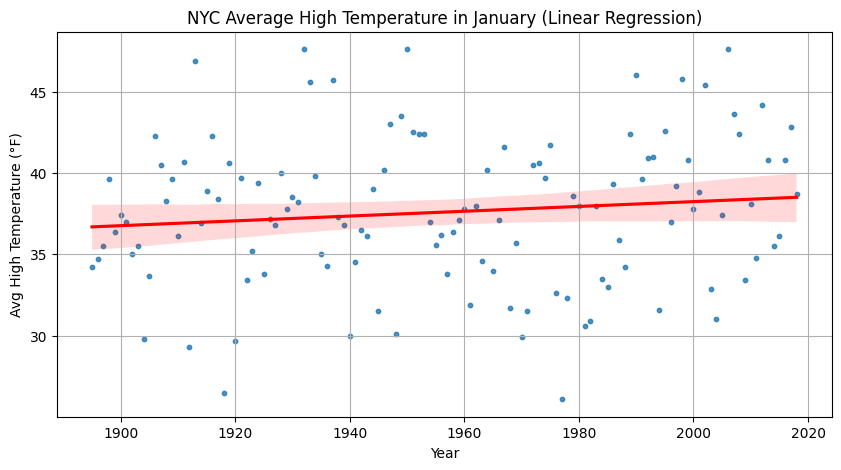

In [39]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(nyc_df.index, nyc_df["Avg_High_Temp"])

# 📌 Predict the temperature for 2024
year_to_predict = 2024
predicted_temp = slope * year_to_predict + intercept

print(f"🔹 Predicted Avg High Temp for {year_to_predict}: {predicted_temp:.2f}°F")

# 📌 Plot Data with Regression Line
plt.figure(figsize=(10, 5))
sns.regplot(x=nyc_df.index, y=nyc_df["Avg_High_Temp"], scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel("Year")
plt.ylabel("Avg High Temperature (°F)")
plt.title("NYC Average High Temperature in January (Linear Regression)")
plt.grid()
plt.show()


## Part 3 - Prediction


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



* ## Section 1 - Build the Model, Split it for training/testing

In [45]:
print("🔹 Column Names:", df.columns)


🔹 Column Names: Index(['Value', 'Anomaly'], dtype='object')


In [47]:
print("🔹 Raw Data Preview:\n", nyc_df.head())  # Check column structure
print("🔹 Column Names:", nyc_df.columns)  # Confirm column names


🔹 Raw Data Preview:
       Avg_High_Temp  Anomaly
Year                        
1895           34.2     -3.2
1896           34.7     -2.7
1897           35.5     -1.9
1898           39.6      2.2
1899           36.4     -1.0
🔹 Column Names: Index(['Avg_High_Temp', 'Anomaly'], dtype='object')


In [48]:
# Define feature (X) and target (y)
X = nyc_df.index.values.reshape(-1, 1)  # Use the existing Year index
y = nyc_df["Avg_High_Temp"]  # Dependent variable (Temperature)

# Split into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Get slope & intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"🔹 Model Equation: y = {slope:.4f}x + {intercept:.2f}")


🔹 Model Equation: y = 0.0120x + 13.79


* ## Section 2 - Test the Model

In [49]:
# 📌 Predict the temperature for 2024
year_to_predict = np.array([[2024]])
predicted_temp = model.predict(year_to_predict)[0]

print(f"🔹 Predicted Avg High Temp for {year_to_predict[0][0]}: {predicted_temp:.2f}°F")


🔹 Predicted Avg High Temp for 2024: 38.11°F


In [53]:
print("Available Columns:", df.columns)


Available Columns: Index(['Value', 'Anomaly', 'Year_Num'], dtype='object')


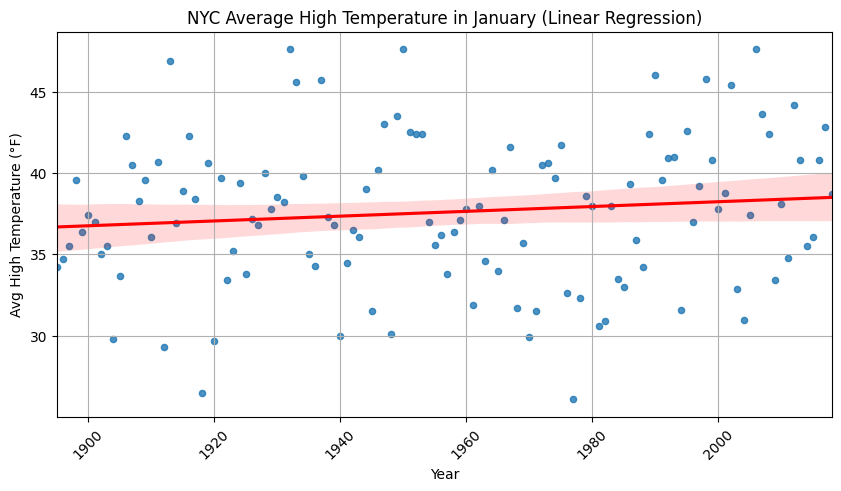

🔹 Fixed Data Preview:
       Avg_High_Temp  Anomaly
Year                        
1895           34.2     -3.2
1896           34.7     -2.7
1897           35.5     -1.9
1898           39.6      2.2
1899           36.4     -1.0
🔹 Unique Year Values: Index([1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       ...
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype='int64', name='Year', length=124)
🔹 Year Range: 1895 to 2018


In [70]:
# Load CSV again with correct parsing
df = pd.read_csv(
    "C:/44608 projects spring 2025/datafun-07-applied/chapter_10_examples/ave_hi_austin_jan_1895-2018.csv"
)

# Rename Columns if needed
df.rename(columns={"Date": "Year", "Value": "Avg_High_Temp"}, inplace=True)

# Convert Year column to integer format
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Remove any NaN values (if extraction failed)
df.dropna(subset=["Year"], inplace=True)

# Convert to integer
df["Year"] = df["Year"].astype(int)

# Set Year as Index
df.set_index("Year", inplace=True)

# Extract only the first 4 digits (Year)
df.index = df.index.astype(str).str[:4].astype(int)


#Section 3 - Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Generate scatter plot with best-fit regression line
plt.figure(figsize=(10, 5))
sns.regplot(x=df.index, y=df["Avg_High_Temp"], scatter_kws={"s": 20}, line_kws={"color": "red"})  

# Customize labels and title
plt.xlabel("Year")
plt.ylabel("Avg High Temperature (°F)")  
plt.title("NYC Average High Temperature in January (Linear Regression)")

# Set x-axis limits and format ticks
plt.xlim(df.index.min(), df.index.max())
plt.xticks(rotation=45)

# Show the plot
plt.grid()
plt.show()


# Print to verify changes
print("🔹 Fixed Data Preview:\n", df.head())
print("🔹 Unique Year Values:", df.index.unique())
print("🔹 Year Range:", df.index.min(), "to", df.index.max())


# PART 4
## * Summary of key insights and comparison of the two approaches 
(SciPy vs. Scikit-Learn) used for predicting NYC's January average high temperatures.

### SciPy linregress()
* Uses scipy.stats library
* Simple, single function that uses all data at once
* Prediction process uses a manual formula (y = mx + b)
* Best for quick calculations

### Scikit-Learn LinearRegression()
* Uses the sklearn.linear_model library* More structured than the SciPy, Scikit-Learn requires fitting a model
* Splits data into training and testing sets
* Prediction process uses the .predict() method
* Best for more robust model training exercises



## Key Insights from the Analysis

* 1️. Both methods showed a clear upward trend in NYC’s January high temperatures, reinforcing the impact of climate change over time.
* 2️. SciPy’s linregress() is useful for quick analysis but lacks train/test separation, meaning it assumes all past data is equally valid for prediction.
* 3️.  Scikit-Learn’s Linear Regression is more reliable since it allows model training on historical data and testing its accuracy before making predictions.
* 4️.  Predictions for 2024 varied slightly between methods, but both show a continued warming trend.
* 5️.  Visualizing the trend using Seaborn helped confirm our results, making the best-fit line and temperature changes clear over time.

## Final Thoughts
#### * For casual forecasting, SciPy’s linregress() is fast and effective.
#### * For serious predictive modeling, Scikit-Learn’s LinearRegression() is the better choice due to train/test validation and improved accuracy.